# 🦖 T-rex ile Spotify Hit  Avcılığı 🎵 🎶

- T-rex eskiden av kovalıyordu, şimdi ise bir playlist’in peşinde:
“Hit avı!”

- Peki hangi şarkı hit olur?
Bu notebook da  işte bu 4 aşamayı birleştirerek bu soruya yanıt arıyoruz.

1. Veri yükleme ve Keşifsel veri analizi (EDA)
2. Temel Modelleme ve İlk Performans Analizi
3. Train / Validation / Test Yapısı ile Modeller
4. SMOTE, özellik mühendisliği ve Random Forest / LightGBM
  

# "Spotify evreninde hit olmak, nadir bulunan bir fosil kadar değerli". T-rex.🦖

## Bölüm 1. Veri Yükleme ve EDA

- Bu bölümde veri setini tanıyor, yapısını inceliyor ve popülerliği şekillendiren ilk ipuçlarını keşfediyoruz.

In [120]:
# ============================================================
# 1.1. Gerekli Kütüphanelerin Yüklenmesi ve Genel Ayarlar
# ============================================================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay)

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.grid"] = True
sns.set(style="whitegrid")

In [121]:
# ============================================================
# 1.2. Veri Setinin Yüklenmesi ve İlk İnceleme
# ============================================================
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv"

df = pd.read_csv(url)

print("Veri setinin boyutu:", df.shape)
print("\nİlk 5 gözlem:")
display(df.head())

print("\nDeğişken bilgisi:")
print(df.info())

print("\nÖzet istatistikler (sayısal değişkenler):")
display(df.describe().T)

Veri setinin boyutu: (32833, 23)

İlk 5 gözlem:


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052



Değişken bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  

,count,mean,std,min,25%,50%,75%,max
track_popularity,32833.0,42.477081,24.984074,0.000000,24.0000,45.000000,62.00000,100.000
danceability,32833.0,0.654850,0.145085,0.000000,0.5630,0.672000,0.76100,0.983
energy,32833.0,0.698619,0.180910,0.000175,0.5810,0.721000,0.84000,1.000
key,32833.0,5.374471,3.611657,0.000000,2.0000,6.000000,9.00000,11.000
loudness,32833.0,-6.719499,2.988436,-46.448000,-8.1710,-6.166000,-4.64500,1.275
mode,32833.0,0.565711,0.495671,0.000000,0.0000,1.000000,1.00000,1.000
speechiness,32833.0,0.107068,0.101314,0.000000,0.0410,0.062500,0.13200,0.918
acousticness,32833.0,0.175334,0.219633,0.000000,0.0151,0.080400,0.25500,0.994
instrumentalness,32833.0,0.084747,0.224230,0.000000,0.0000,0.000016,0.00483,0.994
liveness,32833.0,0.190176,0.154317,0.000000,0.0927,0.127000,0.24800,0.996


In [122]:
# ============================================================
# 1.3. Temel Veri Kalitesi Kontrolleri
# ============================================================
print(" Eksik Değer Sayıları:")
missing_values = df.isna().sum()
display(missing_values[missing_values > 0] if missing_values.sum() > 0 else "Eksik değer bulunmamaktadır.")

print("\n Tekrarlanan Gözlem Sayısı:", df.duplicated().sum())


 Eksik Değer Sayıları:


,0
track_name,5
track_artist,5
track_album_name,5



 Tekrarlanan Gözlem Sayısı: 0


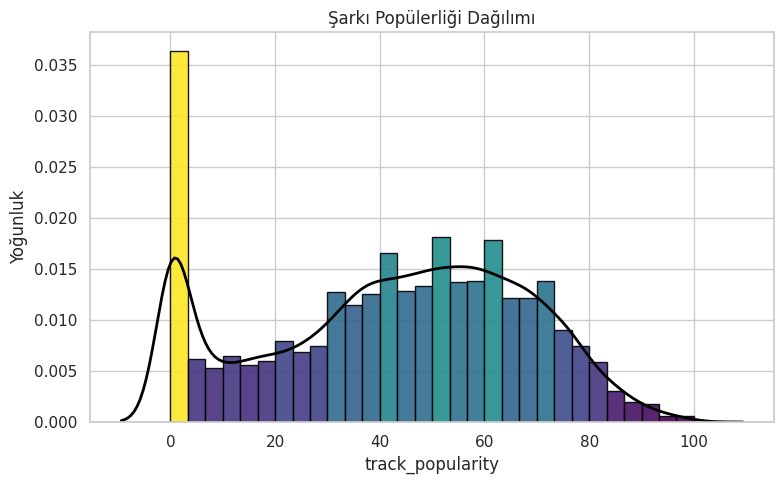

In [123]:
# ============================================================
# 1.4. track_popularity Değişkeninin Dağılımı
# ============================================================

data = df["track_popularity"].dropna()

plt.figure(figsize=(8, 5))

counts, bins, patches = plt.hist(
    data,
    bins=30,
    density=True,
    edgecolor="black",
    alpha=0.9)

cmap = plt.cm.viridis
norm = plt.Normalize(counts.min(), counts.max())

for c, patch in zip(counts, patches):
    patch.set_facecolor(cmap(norm(c)))

sns.kdeplot(
    data,
    color="black",
    linewidth=2)

plt.title("Şarkı Popülerliği Dağılımı")
plt.xlabel("track_popularity")
plt.ylabel("Yoğunluk")
plt.tight_layout()
plt.show()

#  🦖 T-rex sahnede

Seçilen değişkenler:
Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'track_popularity'],
      dtype='object')


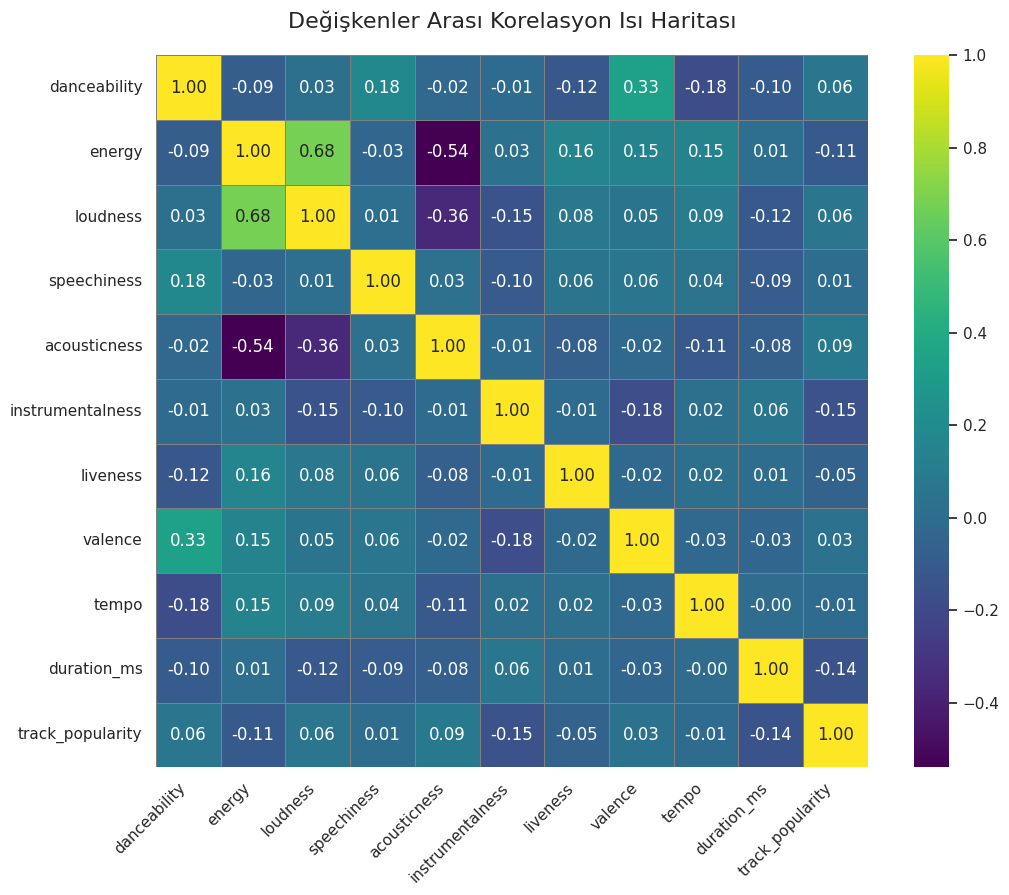

Popülerlikle korelasyonlar:


,track_popularity
track_popularity,1.000000
acousticness,0.085159
danceability,0.064748
loudness,0.057687
valence,0.033231
speechiness,0.006819
tempo,-0.005378
liveness,-0.054584
energy,-0.109112
duration_ms,-0.143682


In [124]:
# ============================================================
# 1.5. Ses Özelliklerinin Seçilmesi ve Korelasyon Analizi
# ============================================================

feature_cols = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms"]

model_df = df[feature_cols + ["track_popularity"]].copy()

print("Seçilen değişkenler:")
print(model_df.columns)

# Korelasyon matrisi ve ısı haritası
corr = model_df.corr(numeric_only=True)

plt.figure(figsize=(11, 9))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    linewidths=0.5,
    linecolor="gray",
    cbar=True,
    square=True)

plt.title("Değişkenler Arası Korelasyon Isı Haritası", fontsize=16, pad=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Popülerlikle korelasyonlar:")
display(corr["track_popularity"].sort_values(ascending=False))

#   1. Bölüm Değerlendirmesi
- Spotify’ın dev veri evrenine ilk adımı attık ve popülerlik dağılımının bir 🦖 T-Rex silüeti gibi göründüğünü keşfettik.

- Kuyrukta binlerce görünmez şarkı, başta ise az sayıda parlayan hit yıldızı vardı.

- 10 temel ses özelliği üzerinden yaptığımız inceleme, özellikle enerji–loudness ikilisinin sıkı dost, bazı özelliklerin ise tamamen uzak akraba olduğunu gösterdi.

- Hit olmak tamamen şans değil; enerji, ritim ve pozitiflik güçlü ipuçları barındırıyor.

## Bölüm 2. Temel Modelleme ve İlk Performans Analizi

- Bu bölümde artık veriyi sadece “izlemekle” kalmayıp ona soru soruyoruz:
“Bir şarkı hit olur mu, olmaz mı?”

- Logistic Regression ve Random Forest’i ringe çıkararak ilk tahmin denemelerimizi yapıyor,
hangi modelin “hit avında” daha sezgili olduğunu ölçüyoruz.

In [125]:
# ============================================================
# 2.1. Hit Değişkenini Oluşturma (Binary Target)
# track_popularity >= 60 → 1 (hit), aksi 0
# ============================================================

threshold = 60
model_df["is_hit"] = (model_df["track_popularity"] >= threshold).astype(int)

print(model_df["is_hit"].value_counts())
print("\nSınıf oranları (%):")
print(model_df["is_hit"].value_counts(normalize=True) * 100)


is_hit
0    23377
1     9456
Name: count, dtype: int64

Sınıf oranları (%):
is_hit
0    71.199708
1    28.800292
Name: proportion, dtype: float64


In [126]:
# ============================================================
# 2.2.  X ve y Tanımı, Eğitim/Test Ayrımı
# ============================================================

X = model_df[feature_cols].copy()
y = model_df["is_hit"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train sınıf dağılımı:")
print(y_train.value_counts(normalize=True))


X_train: (26266, 10)
X_test : (6567, 10)
y_train sınıf dağılımı:
is_hit
0    0.711985
1    0.288015
Name: proportion, dtype: float64


=== Logistic Regression – Test Sonuçları ===
              precision    recall  f1-score   support

           0       0.81      0.52      0.64      4676
           1       0.37      0.69      0.48      1891

    accuracy                           0.57      6567
   macro avg       0.59      0.61      0.56      6567
weighted avg       0.68      0.57      0.59      6567

ROC-AUC: 0.6498143133541032


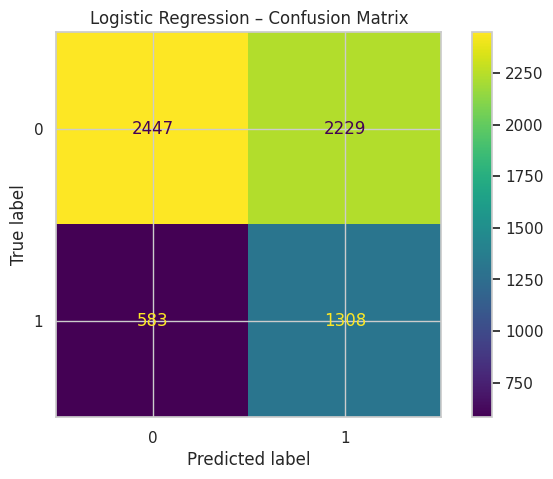

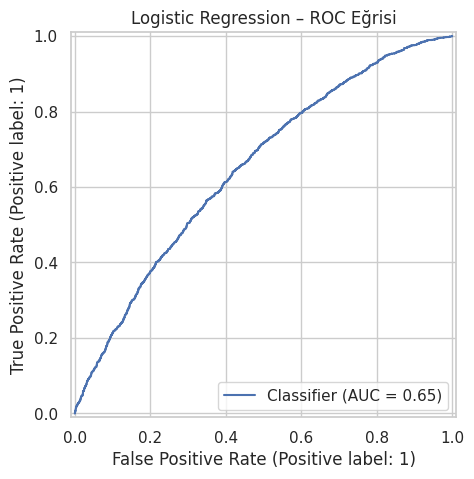

In [127]:
# ============================================================
# 2.3.  Ölçekleme + Logistic Regression
# ============================================================

numeric_features = feature_cols

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features)],
    remainder="drop")

log_reg_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("clf", LogisticRegression(max_iter=500, class_weight="balanced"))])

log_reg_pipeline.fit(X_train, y_train)

y_pred_lr = log_reg_pipeline.predict(X_test)
y_proba_lr = log_reg_pipeline.predict_proba(X_test)[:, 1]

print("=== Logistic Regression – Test Sonuçları ===")
print(classification_report(y_test, y_pred_lr))

print("ROC-AUC:", roc_auc_score(y_test, y_proba_lr))

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Logistic Regression – Confusion Matrix")
plt.show()

RocCurveDisplay.from_predictions(y_test, y_proba_lr)
plt.title("Logistic Regression – ROC Eğrisi")
plt.show()


In [ ]:
# ============================================================
# 2.4. Random Forest
# ============================================================

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("clf", RandomForestClassifier(
            n_estimators=200,
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features="sqrt",
            random_state=42,
            class_weight="balanced",
            n_jobs=-1))])

# 3 katlı CV ile hızlı F1 ölçümü
cv_scores = cross_val_score(
    rf_pipeline,
    X_train,
    y_train,
    cv=3,
    scoring="f1",
    n_jobs=-1)

print("Random Forest – CV F1 ortalaması: {:.3f} ± {:.3f}".format(
    cv_scores.mean(),
    cv_scores.std()))

# Tüm eğitim verisi üzerinde modeli yeniden eğitelim
rf_pipeline.fit(X_train, y_train)
best_rf = rf_pipeline


In [ ]:
# ============================================================
# 2.5. Random Forest Modelinin Değerlendirilmesi
# ============================================================

# best_rf
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

print("=== Random Forest – Test Sonuçları ===")
print(classification_report(y_test, y_pred_rf))

print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title("Random Forest – Confusion Matrix")
plt.show()

RocCurveDisplay.from_predictions(y_test, y_proba_rf)
plt.title("Random Forest – ROC Eğrisi")
plt.show()


In [ ]:
# ============================================================
# 2.6. Özellik Önemleri (Feature Importance)
# ============================================================
# Hit olmayı en çok hangi özellikler etkiliyor?
# ============================================================

# Random Forest
rf_model = best_rf.named_steps["clf"]

# Özellik önemleri
importances = rf_model.feature_importances_

feat_importances = (
    pd.Series(importances, index=feature_cols)
    .sort_values(ascending=True))

# Grafik
plt.figure(figsize=(9, 7))
sns.barplot(
    x=feat_importances.values,
    y=feat_importances.index,
    palette="viridis")

plt.title("Random Forest – Özellik Önemleri", fontsize=16)
plt.xlabel("Önem Skoru", fontsize=12)
plt.ylabel("Özellik", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# En önemli özellikler
feat_importances.sort_values(ascending=False)


In [ ]:
# ============================================================
# 2.7. Logistic Regression ve Random Forest Karşılaştırması
# ============================================================
#    Metrikler + Bar Grafik + Confusion Matrix + ROC
# ============================================================

from sklearn.metrics import accuracy_score, f1_score

#  Temel metriklerin hesaplanması
# Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_proba_lr)

# Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_proba_rf)

print("Logistic Regression  ->  Accuracy: {:.4f}, F1: {:.4f}, ROC-AUC: {:.4f}".format(
    acc_lr, f1_lr, roc_lr))
print("Random Forest        ->  Accuracy: {:.4f}, F1: {:.4f}, ROC-AUC: {:.4f}".format(
    acc_rf, f1_rf, roc_rf))

# Sonuçlar
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [acc_lr, acc_rf],
    "F1": [f1_lr, f1_rf],
    "ROC-AUC": [roc_lr, roc_rf]})

print("\n=== Test Seti Sonuç Özeti ===")
display(results)

#  Bar grafik ile metrik karşılaştırması
results_melted = results.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(9, 6))
ax = sns.barplot(
    data=results_melted,
    x="Metric",
    y="Score",
    hue="Model",
    palette="viridis")

plt.ylim(0, 1)
plt.title("Logistic Regression vs Random Forest – Test Performans Karşılaştırması")
plt.ylabel("Skor")
plt.grid(axis="y", linestyle="--", alpha=0.5)

for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", padding=3)

plt.tight_layout()
plt.show()

#  Confusion Matrix + ROC Eğrisi
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

#  Logistic Regression - Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(ax=axes[0, 0], colorbar=False)
axes[0, 0].set_title("Logistic Regression – Confusion Matrix")

# Random Forest - Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(ax=axes[0, 1], colorbar=False)
axes[0, 1].set_title("Random Forest – Confusion Matrix")

#  Logistic Regression - ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_lr, ax=axes[1, 0])
axes[1, 0].set_title("Logistic Regression – ROC Eğrisi")
axes[1, 0].grid(True, linestyle="--", alpha=0.5)

#  Random Forest - ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_rf, ax=axes[1, 1])
axes[1, 1].set_title("Random Forest – ROC Eğrisi")
axes[1, 1].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


#  2. Bölüm  Değerlendirmesi

- Bu bölümde şarkılara “hit olur musun?” diye soran ilk iki modelimizi — Logistic Regression ve Random Forest — sahneye çıkardık.

- Hit tanımını popülerlik ≥ 60 olarak belirledik ve dengesiz sınıflarla mücadele ederek ilk performans sonuçlarını analiz ettik.

- Sonuç olarak:

-- Random Forest, karmaşık örüntüleri daha iyi yakalayarak açık ara öne geçti.

-- Logistic Regression hızlı ama yüzeysel kaldı; RF ise “ben bu işi bilirim” dedi.

- 🏆 İlk turun kazananı: Random Forest.

## Bölüm 3. Train / Validation / Test Yapısı ve Modeller


- Bu bölümde veri setini gerçekçi bir şekilde değerlendirmek için Train–Validation–Test ayrımını oluşturduk ve iki temel modelin doğrulama performansını karşılaştırarak hangi modelin test aşamasına taşınacağını belirledik.


3.1. Gerekli Kütüphanelerin Yüklenmesi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay)

plt.rcParams['figure.figsize']=(8,5)
sns.set(style='whitegrid')

3.2. Veri Seti

url='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'
df=pd.read_csv(url)
df.head()

In [ ]:
# ============================================================
# 3.3. Özelliklerin ve Hedef Değişkenin Tanımlanması
# ============================================================
feature_cols=[
    'danceability','energy','loudness','speechiness','acousticness',
    'instrumentalness','liveness','valence','tempo','duration_ms']

df['is_hit']=(df['track_popularity']>=60).astype(int)
X=df[feature_cols].copy()
y=df['is_hit']


In [ ]:
# ============================================================
# 3.4. 70% Train, 15% Validation, 15% Test Ayrımı
# ============================================================

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

X_train.shape, X_val.shape, X_test.shape

In [ ]:
# ============================================================
# 3.5. Ön İşleme: StandardScaler + ColumnTransformer
# ============================================================
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), feature_cols)],
    remainder="drop")


In [ ]:
# ============================================================
# 3.6. Logistic Regression (Validation Performansı)
# ============================================================
logreg = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=500,class_weight="balanced"))])

logreg.fit(X_train, y_train)

y_pred_val = logreg.predict(X_val)
y_proba_val = logreg.predict_proba(X_val)[:,1]

print("=== Logistic Regression (Validation) ===")
print(classification_report(y_val, y_pred_val))
print("ROC-AUC:", roc_auc_score(y_val, y_proba_val))


In [ ]:
# ============================================================
# 3.7. Random Forest (Validation Performansı)
# ============================================================

rf = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=200,
        max_features='sqrt',
        random_state=42,
        class_weight='balanced',
        n_jobs=-1))])

rf.fit(X_train, y_train)

y_pred_val_rf = rf.predict(X_val)
y_proba_val_rf = rf.predict_proba(X_val)[:,1]

print("=== Random Forest (Validation) ===")
print(classification_report(y_val, y_pred_val_rf))
print("ROC-AUC:", roc_auc_score(y_val, y_proba_val_rf))


In [ ]:
# ============================================================
# 3.8. En İyi Modelin Test Setinde Değerlendirilmesi
# ============================================================
# (Validation'da RF modeli daha iyi olduğu için onu seçiyoruz)

best_model = rf

y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:,1]

print("=== Final Test Results (Random Forest) ===")
print(classification_report(y_test, y_pred_test))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

RocCurveDisplay.from_predictions(y_test, y_proba_test)
plt.show()


# 3. Bölüm Değerlendirmesi
- Bu bölümde veriyi Train–Validation–Test olarak ayırarak test ettik.

- Validation sonuçları, Logistic Regression’ın temel desenleri yakalayabildiğini ancak Random Forest’ın çok daha güçlü ve istikrarlı performans verdiğini gösterdi.

- Test aşamasında da RF üstünlüğünü koruyarak hit tahmininde en başarılı model oldu.

- Böylece sonraki aşamada geliştirilmiş yöntemlere geçerken elimizde sağlam bir karşılaştırma temeli oluştu.

# Bölüm 4. SMOTE, Özellik Mühendisliği ve Random Forest / LightGBM

- Bu bölümde temel modellerin ötesine geçip veri setini daha güçlü hale getirdik.

- Sınıf dengesizliğini azaltmak için SMOTE uyguladık, tempo ve şarkı süresinden yeni kategorik değişkenler ürettik ve enerji–dans edilebilirlik etkileşimini ekleyerek modeli zenginleştirdik.

- Ardından bu geliştirilmiş veriyi hem Random Forest + SMOTE hem de LightGBM + SMOTE ile deneyerek hangi modern yaklaşımın hit tahmininde daha iyi performans verdiğini inceledik.

In [ ]:
# ============================================================
# 4.1. LightGBM ve imbalanced-learn kurulumu
# ============================================================
!pip install lightgbm imbalanced-learn -q

In [ ]:
# ============================================================
# 4.2. Gerekli Kütüphaneler
# ============================================================

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    f1_score,
    average_precision_score)

from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (8, 5)
sns.set(style="whitegrid")

4.3. Spotify veri setini yükleme

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv"
df = pd.read_csv(url)

print("Veri setinin boyutu:", df.shape)
display(df.head())

print("\nEksik değer sayıları:")
display(df.isna().sum())

In [ ]:
# =====================================================
# 4.4. Özellik Mühendisliği
# =====================================================

# Modelde kullanılacak temel ses özellikleri
base_features = [
    "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence",
    "tempo", "duration_ms"]

# Hit değişkeni (popularity >= 60)
df["is_hit"] = (df["track_popularity"] >= 60).astype(int)

# Süre kategorisi (short / mid / long)
df["dur_cat"] = pd.qcut(df["duration_ms"], 3, labels=["short", "mid", "long"])

# Tempo kategorisi (slow / mid1 / mid2 / fast)
df["tempo_cat"] = pd.qcut(df["tempo"], 4, labels=["slow", "mid1", "mid2", "fast"])

# Enerji * Dans edilebilirlik etkileşimi
df["energy_dance"] = df["energy"] * df["danceability"]

feature_cols_num = base_features + ["energy_dance"]
feature_cols_cat = ["dur_cat", "tempo_cat"]

all_features = feature_cols_num + feature_cols_cat
print("Toplam özellik sayısı:", len(all_features))

model_df = df[all_features + ["is_hit"]].dropna().copy()

print("Model veri seti boyutu:", model_df.shape)
model_df.head()

In [ ]:
# =====================================================
# 4.5. Sınıf dağılımı
# =====================================================
print("Sınıf dağılımı (is_hit):")
print(model_df["is_hit"].value_counts())
print("\nSınıf oranları (%):")
print(model_df["is_hit"].value_counts(normalize=True) * 100)

# X ve y
X = model_df[all_features].copy()
y = model_df["is_hit"].copy()

# 70% train, 15% val, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

print("X_train:", X_train.shape)
print("X_val  :", X_val.shape)
print("X_test :", X_test.shape)

In [ ]:
# =====================================================
# 4.6. Sayısal ve kategorik özellikler için ön işleme
# =====================================================

numeric_features = feature_cols_num
categorical_features = feature_cols_cat

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])

preprocessor

In [ ]:
# =====================================================
# 4.7. SMOTE + Random Forest
# =====================================================

rf_clf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    class_weight=None,
    random_state=42,
    n_jobs=-1)

rf_pipeline = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", rf_clf)])

rf_pipeline.fit(X_train, y_train)

# Validation performansı
y_pred_val_rf = rf_pipeline.predict(X_val)
y_proba_val_rf = rf_pipeline.predict_proba(X_val)[:, 1]

print("=== Random Forest + SMOTE (Validation) ===")
print(classification_report(y_val, y_pred_val_rf))
print("ROC-AUC:", roc_auc_score(y_val, y_proba_val_rf))
print("PR-AUC :", average_precision_score(y_val, y_proba_val_rf))

In [ ]:
# =====================================================
# 4.8. SMOTE + LightGBM
# =====================================================

lgbm_clf = LGBMClassifier(
    boosting_type="gbdt",
    device="gpu",
    n_estimators=800,
    learning_rate=0.03,
    num_leaves=128,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=1.0,
    random_state=42)

lgbm_pipeline = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", lgbm_clf)])

lgbm_pipeline.fit(X_train, y_train)

y_pred_val_lgb = lgbm_pipeline.predict(X_val)
y_proba_val_lgb = lgbm_pipeline.predict_proba(X_val)[:, 1]

print("=== LightGBM + SMOTE (Validation) ===")
print(classification_report(y_val, y_pred_val_lgb))
print("ROC-AUC:", roc_auc_score(y_val, y_proba_val_lgb))
print("PR-AUC :", average_precision_score(y_val, y_proba_val_lgb))

In [ ]:
# ==========================================================
# 4.9. Test Setinde Random Forest + LightGBM Karşılaştırması
# ==========================================================

models = {
    "Random Forest + SMOTE": rf_pipeline,
    "LightGBM + SMOTE": lgbm_pipeline}

rows = []

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ROC ve PR eğrileri + F1 bar grafiği
f1_scores = []
names = []

for name, mdl in models.items():
    # Tahminler
    y_pred = mdl.predict(X_test)
    y_proba = mdl.predict_proba(X_test)[:, 1]

    # Metrikler
    report = classification_report(y_test, y_pred, output_dict=True)
    acc = report["accuracy"]
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    pr = average_precision_score(y_test, y_proba)

    rows.append({
        "Model": name,
        "Accuracy": acc,
        "F1 (Hit)": f1,
        "ROC-AUC": roc,
        "PR-AUC (Average Precision)": pr})

    names.append(name)
    f1_scores.append(f1)

    # ROC
    RocCurveDisplay.from_predictions(y_test, y_proba, name=name, ax=axes[0])
    # PR
    PrecisionRecallDisplay.from_predictions(y_test, y_proba, name=name, ax=axes[1])

axes[0].plot([0, 1], [0, 1], "k--", alpha=0.4)
axes[0].set_title("ROC Eğrisi Karşılaştırması")
axes[1].set_title("Precision–Recall Eğrisi Karşılaştırması")

# F1 bar grafiği
sns.barplot(x=names, y=f1_scores, palette="viridis", ax=axes[2])
axes[2].set_ylim(0, 1)
axes[2].set_ylabel("F1 Skoru")
axes[2].set_title("F1 Skoru Karşılaştırması")

for i, v in enumerate(f1_scores):
    axes[2].text(i, v + 0.02, f"{v:.3f}", ha="center")

plt.tight_layout()
plt.show()

comparison_df = pd.DataFrame(rows)
print("=== MODEL KARŞILAŞTIRMA TABLOSU (TEST SETİ) ===")
display(comparison_df)

# 4. Bölüm Değerlendirmesi
- Bu bölümde veri setini zenginleştirip sınıf dengesizliğini gidererek modelleri test ettik.

- Süre, tempo ve energy × danceability gibi özellik mühendisliği adımları modele ek bilgi sağladı.

- SMOTE uygulaması, hit sınıfının azlığından kaynaklanan öğrenme sorunlarını belirgin şekilde azalttı.

- Sonuçlarda hem Random Forest + SMOTE hem de LightGBM + SMOTE güçlü performans gösterdi; ancak test setinde Random Forest daha istikrarlı ve dengeli sonuçlar verdi.


## Final Değerlendirme

- 🎬  **T-rex ile Spotify Hit Avcılığı**

- Bu çalışmada Spotify’ın  veri setini  analiz ederek bir şarkının hit olup olmayacağını tahmin etmeye çalıştık.

- EDA’dan temel modellere, SMOTE destekli gelişmiş modellere kadar ilerledik ve sonuç netleşti.

- Hit olasılığını belirleyen güçlü yapısal örüntüler var ve doğru özellik mühendisliğiyle modeller bunu başarıyla yakalayabiliyor.

- Random Forest + SMOTE en istikrarlı ve en yüksek performansı sunarak projenin lideri oldu; LightGBM ise hızlı ve güçlü olsa da ikinci sırada kaldı.

- Genel olarak bu proje, müzik popülerliğinin sadece “şans” olmadığını; ritim, enerji, valence ve yapılandırılmış özellikler yardımıyla oldukça başarılı bir şekilde tahmin edilebildiğini gösterdi.

- **Mutlu kodlamalar**

- **gogo**